Instructions
Objective:
To segment customers into groups for a targeted marketing strategy.

Data:
Dataset obtained from Credit Card Dataset for Clustering | Kaggle. Original source unknown. The dataset file is attached below for download. 

Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

Steps to Completion:
Create a Jupyter notebook and complete the following steps. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import numpy as np


1. Data

A. Load CC General.csv into a pandas DataFrame and print the header. Use pandas.DataFrame.describe to summarize the data. In a Markdown cell, explain the meaning of each column, make observations based on these statistics, and discuss whether they provide useful insights

In [2]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/CCGENERAL.csv"
credit_data = pd.read_csv(url)
credit_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Column Descriptions

### Credit Card Dataset: Column Guide
These definitions are based on the standard CC GENERAL data used for customer segmentation and behavior analysis (Bhasin, 2017). 

### The Basics
- CUST_ID: Just a unique ID for each cardholder. It’s categorical, so don't try to run any math on it.

- BALANCE: The average amount the customer carries on their card month-to-month.

- BALANCE_FREQUENCY: A score from 0 to 1 showing how often the balance actually changes. A "1" means their balance updates every single month; lower scores mean the account is relatively inactive.

- TENURE: How long they’ve been a customer (usually ranges from 6 to 12 months in this specific set).

### Spending Habits 
- PURCHASES: Total spend over the last year.

- ONEOFF_PURCHASES: Total amount spent on "lump sum" or single transactions (no installments).

- INSTALLMENTS_PURCHASES: Total spend specifically handled through monthly payment plans.

- CASH_ADVANCE: Total cash the customer withdrew from the card (essentially a short-term loan).

### Activity & Frequency
<!-- All "Frequency" columns are scaled from 0 to 1. Think of 1 as "happening constantly" and 0 as "never happened." -->

- PURCHASES_FREQUENCY: How often they use the card for any purchase.

- ONEOFF_PURCHASES_FREQUENCY: How often they make those big, single purchases.

- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently they opt for installment-based payments.

- CASH_ADVANCE_FREQUENCY: How often they take out cash advances.

- PURCHASES_TRX: The raw count of total purchase transactions.

- CASH_ADVANCE_TRX: The raw count of total cash advance transactions.

### Credit & Repayment
- CREDIT_LIMIT: The maximum spending limit set by the bank.

- PAYMENTS: Total amount the customer paid back over the last 12 months.

- MINIMUM_PAYMENTS: The portion of their payments that went toward the "minimum due" amount.

- PRC_FULL_PAYMENT: The percentage of months where the customer paid off their entire balance rather than just the minimum. This is a great indicator of financial health


B. Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. Use pandas.DataFrame.duplicates to check for duplicate entries. Clean the dataset so there are no missing values, duplicate rows, or incorrect data types. Document the changes and cleaning process in Markdown.


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Cleaning

In [5]:
print("--- Duplicate Row Report ---")
print(f"Duplicates found: {credit_data.duplicated().sum()}")

print("-" * 30) # Prints a line of 30 dashes

print("--- Missing Value Report ---")
print(credit_data.isna().sum()[credit_data.isna().sum() > 0])

--- Duplicate Row Report ---
Duplicates found: 0
------------------------------
--- Missing Value Report ---
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


In [6]:
credit_data['MINIMUM_PAYMENTS'] = credit_data['MINIMUM_PAYMENTS'].fillna(credit_data['MINIMUM_PAYMENTS'].median())
credit_data['CREDIT_LIMIT'] = credit_data['CREDIT_LIMIT'].fillna(credit_data['CREDIT_LIMIT'].median())

# Verify that there are no missing values left
print("Missing values after fix:", credit_data.isna().sum().sum())

print("--- Missing Value Report ---")
print(credit_data.isna().sum()[credit_data.isna().sum() > 0])

Missing values after fix: 0
--- Missing Value Report ---
Series([], dtype: int64)


We went with median imputation for the missing values because only a small number of records were missing, so it didn't make sense to just delete them and lose that data. Also, since financial data usually has a few extreme outliers, using the median is a lot safer and keeps our results more accurate than using the mean (ApX Machine Learning, 2026)


C. Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Record your observations and discuss the insights gained in Markdown. 


In [7]:
Cust_id = credit_data["CUST_ID"]

clean_cust_id = credit_data.drop(["CUST_ID", "PURCHASES", "PURCHASES_FREQUENCY"], axis=1)
clean_cust_id = clean_cust_id.reset_index(drop=True)
clean_cust_id.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.4,0.000000,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Dropping unneeded columns:

- CUST_ID: This is just an identifier column, we are storing in in a separate database for mapping at a later stage 

- PURCHASES: We are dropping this column because it's a combination of both the ONEOFF_PURCHASES & INSTALLMENTS_PURCHASES. This makes purchases hard to interpret without spending more resources interpreting and or splitting purchases to figure out the ONEOFF and INSTALLMENT purchase ratios 

- PURCHASES_FREQUENCY: The same reason as Purchases.

### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Credit Data')

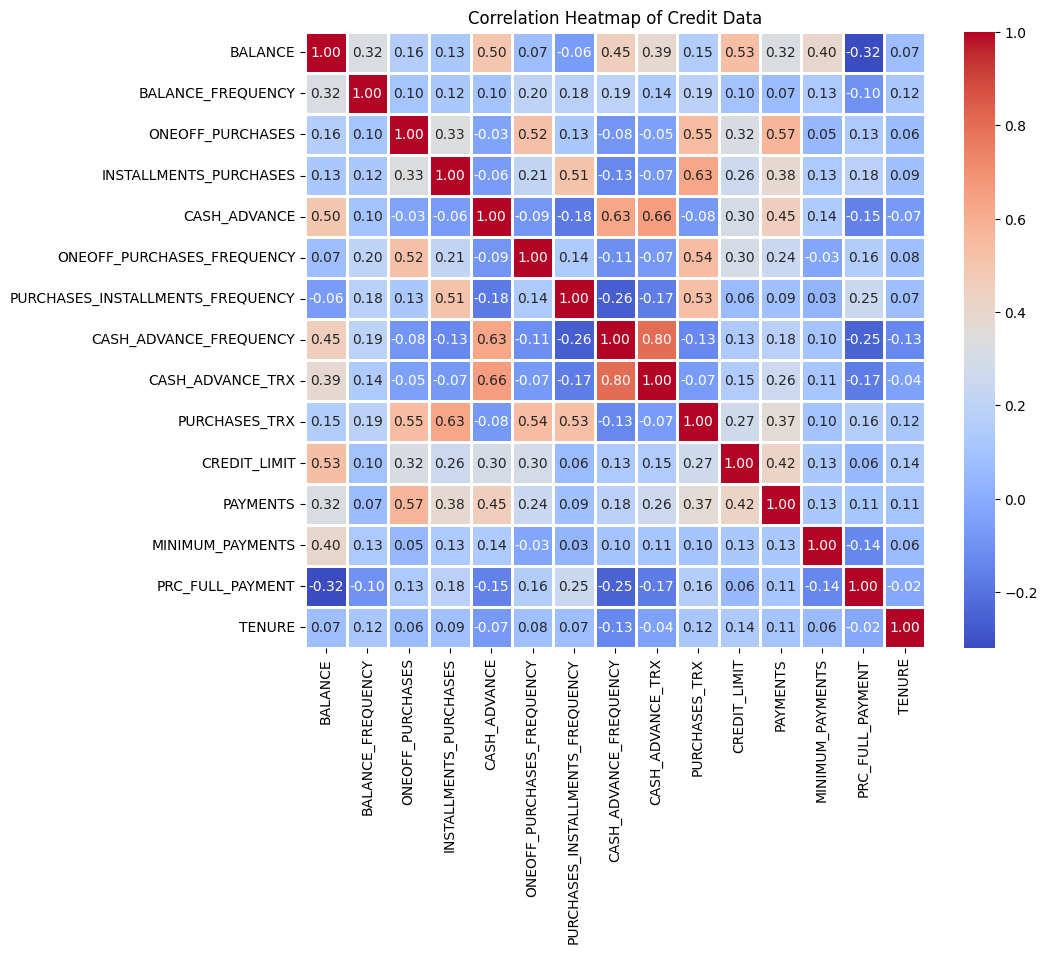

In [8]:
corr = clean_cust_id.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1
)
plt.title("Correlation Heatmap of Credit Data")

2. Modeling
A. Use sklearn.preprocessing.MinMaxScaler to scale the data and print the transformed header. 

In [9]:
scaler = MinMaxScaler()
# Fit dataset into new variable using scaler
scaled_x = scaler.fit_transform(clean_cust_id)
# create dataframe with index and column names
df_scaled = pd.DataFrame(scaled_x, columns=clean_cust_id.columns, index=clean_cust_id.index)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.000000,0.00424,0.000000,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.00000,0.136685,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.018968,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.036775,0.00000,0.004366,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000393,0.00000,0.000000,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


B. Use sklearn.cluster.AgglomerativeClustering to cluster the data. Create at least 10 different models using various hyperparameter combinations (n_clusters, metric, linkage, distance_threshold). Calculate the silhouette score for each model and tabulate the results. 

In [10]:
# Different linkage methods to evaluate
methods = ['ward', 'single', 'average', 'complete']

To efficiently run through different model variations, we decided to create a dictionary with this structure:

```
    <models_dict>[(<method>, <# of clusters>)] = <(corresponding_silhouette_score, labels)>

```
The keys are a tuple with its method and a specific number of clusters, and the values storing are different silhouette scores.

In [11]:
# Evaluate different clustering models using silhouette scores - Metric Euclidean
sk_models_euclidean = {}
for method in methods:
    for t in range(2, 7):
        model = AgglomerativeClustering(n_clusters = t, metric="euclidean", linkage=method)
        labels = model.fit_predict(scaled_x)
        sil_score = silhouette_score(scaled_x, labels, metric="euclidean")
        sk_models_euclidean[(method, t)] = (sil_score, labels)

# Evaluate different clustering models using silhouette scores - Metric Manhattan
sk_models_manhattan = {}
for method in methods:
    for t in range(2, 7):
        if method == 'ward':
            continue  # Ward linkage is not defined for Manhattan distance
        model = AgglomerativeClustering(n_clusters = t, metric="manhattan", linkage=method)
        labels = model.fit_predict(scaled_x)
        sil_score = silhouette_score(scaled_x, labels, metric="manhattan")
        sk_models_manhattan[(method, t)] = (sil_score, labels)

Now this dictionaries are going to be used to store the results in a dataframe format, making them easier to read.

In [35]:
restructured_sk_models_euclidean = {k: v[0] for k, v in sk_models_euclidean.items()}
# Creating DataFrame for Euclidean results
sk_dfs_models_euclidean = pd.DataFrame.from_dict(restructured_sk_models_euclidean, orient='index', columns=['Silhouette Score'])
sk_dfs_models_euclidean.index = pd.MultiIndex.from_tuples(sk_dfs_models_euclidean.index, names=['Method', 'n_clusters'])
sk_dfs_models_euclidean.reset_index(inplace=True)
sk_dfs_models_euclidean.pivot(index='n_clusters', columns='Method', values='Silhouette Score')

# Creating DataFrame for Manhattan results
restructured_sk_models_manhattan = {k: v[0] for k, v in sk_models_manhattan.items()}
sk_dfs_models_manhattan = pd.DataFrame.from_dict(restructured_sk_models_manhattan, orient='index', columns=['Silhouette Score'])
sk_dfs_models_manhattan.index = pd.MultiIndex.from_tuples(sk_dfs_models_manhattan.index, names=['Method', 'n_clusters'])
sk_dfs_models_manhattan.reset_index(inplace=True)
sk_dfs_models_manhattan.pivot(index='n_clusters', columns='Method', values='Silhouette Score')

# Joining both DataFrames for comparison
sk_dfs_combined = sk_dfs_models_euclidean.merge(
    sk_dfs_models_manhattan,
    how='left',
    on=['Method', 'n_clusters'],
    suffixes=('_euclidean', '_manhattan')
)
sk_dfs_combined.pivot(index='n_clusters', columns='Method', values=['Silhouette Score_euclidean', 'Silhouette Score_manhattan'])
sk_dfs_combined

,Method,n_clusters,Silhouette Score_euclidean,Silhouette Score_manhattan
0,ward,2,0.260618,NaN
1,ward,3,0.264139,NaN
2,ward,4,0.253146,NaN
3,ward,5,0.266980,NaN
4,ward,6,0.258376,NaN
5,single,2,0.525774,0.646648
6,single,3,0.407242,0.539123
7,single,4,0.400674,0.532305
8,single,5,0.315643,0.489400
9,single,6,0.290730,0.488136


C. Use scipy.cluster.hierarchy.fcluster to perform hierarchical clustering using scipy package. Create at least 10 different models using different hyperparameters (t, criterion, depth). Calculate the silhouette score for each and tabulate the results.


Taking into account tentative number of clusters, we can also specify different values for `maxclust`, trying out different cluster values like we did for sklearn to look for a suitable option.

We are also using the same dictionary structure we used for the sklearn approach.


In [36]:
methods = ['ward', 'single', 'average', 'complete']

In [37]:
# Evaluate different clustering models using silhouette scores - Metric Euclidean
scipy_models_euclidean = {}
for method in methods:
    for t in range(2, 7):
        model = fcluster(linkage(scaled_x, method=method, metric='euclidean'), t, criterion='maxclust')
        sil_score = silhouette_score(scaled_x, model, metric="euclidean")
        scipy_models_euclidean[(method, t)] = (sil_score, model)

# Evaluate different clustering models using silhouette scores - Metric Manhattan
scipy_models_manhattan = {}
for method in methods:
    for t in range(2, 7):
        if method == 'ward':
            continue  # Ward linkage is not defined for Manhattan distance
        model = fcluster(linkage(scaled_x, method=method, metric='cityblock'), t, criterion='maxclust')
        sil_score = silhouette_score(scaled_x, model, metric="manhattan")
        scipy_models_manhattan[(method, t)] = (sil_score, model)

In [38]:
# Removing cluster labels from the dictionary for DataFrame creation
restructured_scipy_models_euclidean = {k: v[0] for k, v in scipy_models_euclidean.items()}
# Creating DataFrame for Euclidean results
scipy_dfs_models_euclidean = pd.DataFrame.from_dict(restructured_scipy_models_euclidean, orient='index', columns=['Silhouette Score'])
scipy_dfs_models_euclidean.index = pd.MultiIndex.from_tuples(scipy_dfs_models_euclidean.index, names=['Method', 'n_clusters'])
scipy_dfs_models_euclidean.reset_index(inplace=True)
scipy_dfs_models_euclidean.pivot(index='n_clusters', columns='Method', values='Silhouette Score')

# Creaeting DataFrame for Manhattan results
restructured_scipy_models_manhattan = {k: v[0] for k, v in scipy_models_manhattan.items()}
scipy_dfs_models_manhattan = pd.DataFrame.from_dict(restructured_scipy_models_manhattan, orient='index', columns=['Silhouette Score'])
scipy_dfs_models_manhattan.index = pd.MultiIndex.from_tuples(scipy_dfs_models_manhattan.index, names=['Method', 'n_clusters'])
scipy_dfs_models_manhattan.reset_index(inplace=True)
scipy_dfs_models_manhattan.pivot(index='n_clusters', columns='Method', values='Silhouette Score')

# Joining both DataFrames for comparison
scipy_dfs_combined = scipy_dfs_models_euclidean.merge(
    scipy_dfs_models_manhattan,
    how='left',
    on=['Method', 'n_clusters'],
    suffixes=('_euclidean', '_manhattan')
)
scipy_dfs_combined.pivot(index='n_clusters', columns='Method', values=['Silhouette Score_euclidean', 'Silhouette Score_manhattan'])
#scipy_dfs_combined[(scipy_dfs_combined['n_clusters'] == 5) | (scipy_dfs_combined['n_clusters'] == 3) | (scipy_dfs_combined['n_clusters'] == 4)].sort_values(by='Silhouette Score_euclidean', ascending=False)
scipy_dfs_combined

,Method,n_clusters,Silhouette Score_euclidean,Silhouette Score_manhattan
0,ward,2,0.260618,NaN
1,ward,3,0.264139,NaN
2,ward,4,0.253146,NaN
3,ward,5,0.266980,NaN
4,ward,6,0.258376,NaN
5,single,2,0.525774,0.646648
6,single,3,0.407242,0.539123
7,single,4,0.400674,0.532305
8,single,5,0.315643,0.489400
9,single,6,0.290730,0.488136


In [47]:
pd.Series(scipy_models_euclidean[( 'ward', 4)][1]).value_counts()

1    3178
4    2878
2    1783
3    1111
Name: count, dtype: int64

D. Select the best model for this use case and justify your choice in Markdown. If initial models do not produce meaningful clusters, try additional hyperparameter settings and document any iterations and observations.

### Selected Model
- 

3. Conclusions

A. Choose a pair of features and generate a scatter plot of the data, coloring points according to the clusters assigned by your best model. Comment on the plot in Markdown.

B. Generate a histogram showing the number of customers in each cluster and provide observations in Markdown, noting whether cluster sizes make sense.

C. Create a separate DataFrame for each cluster and use pandas.DataFrame.describe to describe each group.

D. Provide a written conclusion summarizing each customer group for the marketing team, based on the summary statistics. Include actionable recommendations derived from the characteristics of each cluster.

E. Analyze whether the chosen model produces meaningful and well-separated clusters. If not, revisit your model run by adjusting hyperparameters and trying again. This process of refining, re-running, and re-evaluating the model is an iterative step. Document all iterations and observations in Markdown.

Note:
Analyze whether the chosen model produces meaningful and well-separated clusters. If not, revisit your model run by adjusting hyperparameters and trying again. This process of refining, re-running, and re-evaluating the model is an iterative step. Document all iterations and observations in Markdown.

Acknowledgment of Group Contributions:
Include a final cell in your notebook titled “Acknowledgment of Contributions.” Clearly list all group members, and have each member indicate whether they are aware of and understand all parts of the work completed, including those they did not personally carry out. Specify the parts of the project each member contributed to, such as data preprocessing, modeling, visualization, or documentation, and highlight any collaborative efforts like reviewing results or interpreting outputs. Be transparent and fair, as grades may be affected if participation was not equitable. Keep the acknowledgment concise while providing enough detail to show each member’s contributions and understanding. 

#### Reference List:

- Bhasin, A. (2017). Credit Card Dataset for Clustering [Dataset]. Kaggle. https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

- ApX Machine Learning. (2026). Strategies for missing data: Imputation vs deletion. ApX. https://apxml.com/courses/intro-eda-course/chapter-2-data-loading-inspection-cleaning/missing-data-strategies
​